# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Dataset Description**: I chose to analyze the movies dataset obtained from the TMDb database.
This dataset contains information for about 11,000 movies during years 1960-2015 collected from The Movie Database (TMDb).
The dataset has about 20 columns execluding ID. The data includes information about movie title,  budget, cast, genre, runtime, production company, director, user ratings, release year and movie budget and revenue with regards to 2010 dollar . In addition, there are some information about movie overview, url, keywords, tagline, vote count, budget and revenue, id and imdb_id. These later information/columns could be execluded from our analysis due to its irrelevance.



### Question(s) for Analysis
>**Research Questions**: Here I can look for two dependent variables, movie popularity and movie revenue, where these parameters/variables could describe the  success of a certain movie. Then, I will invesrigate the different variables, e.g. Director, Budget, Production company or main actor/actress, influencing these parameters.

> We will be investigating the different variables influencing movie popularity, the most growing moive genres and the characteristics of high budget movies and high revenue movies. In later section (EDA), some research questions will be formulated to address these issues.

#### **Research Questions**: We have three main research questions as follow:
> Research Question 1: What is the most growing movie genres in the dataset? Which genres are most popular from year to year?

> Research Question 2: What are the factors affecting movie popularity?

> Research Question 3: What kinds of properties are associated with movies that have high budgets and high revenues?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> First, we will investigate the dataset and explore its sturcture, columns names, datatypes, check for null values, look for irrelevant columns to drop, check for any duplicate attributes and any potential outliers.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# display the number of attributes and number of columns in my df
df.shape

(10866, 21)

In [4]:
# check for null values and check if the data types are practical to use or need any transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Check for any duplications
df[df.duplicated()].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


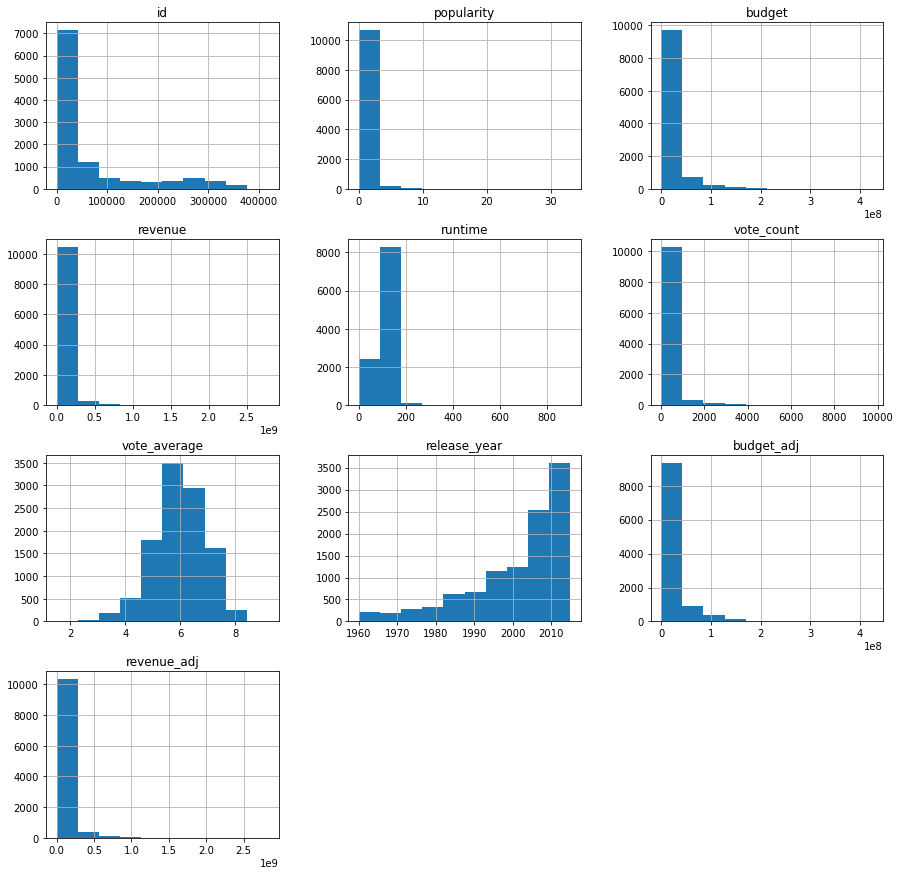

In [6]:
# plotting the histogram of the entire dataset
df.hist(figsize=(15,15));

In [7]:
# Calculate some summary statistics of the df
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00
mean,20645.888889,5.360233,7.772222e+07,1.166350e+09,129.666667,3144.888889,7.077778,1987.111111,9.868816e+07,2.116650e+09
std,45522.543186,4.277144,1.016406e+08,8.726123e+08,32.438403,2721.691957,0.651494,17.933519,1.026917e+08,4.855267e+08
min,11.000000,1.136610,4.000000e+06,2.158800e+08,79.000000,201.000000,5.600000,1961.000000,2.372625e+07,1.574815e+09
25%,597.000000,2.563191,8.000000e+06,4.706540e+08,115.000000,1113.000000,7.100000,1975.000000,2.917944e+07,1.791694e+09
50%,1642.000000,2.900556,1.100000e+07,7.929106e+08,122.000000,1830.000000,7.200000,1982.000000,3.928928e+07,1.907006e+09
75%,12230.000000,9.432768,2.000000e+08,1.845034e+09,136.000000,4654.000000,7.300000,1997.000000,1.839999e+08,2.506406e+09
max,140607.000000,12.037933,2.370000e+08,2.781506e+09,194.000000,8458.000000,7.900000,2015.000000,2.716921e+08,2.827124e+09


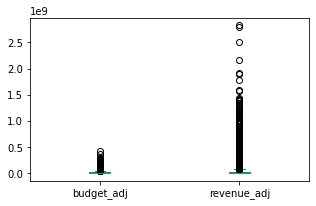

In [8]:
# plotting box plot to check for potential outliers
df[['budget_adj', 'revenue_adj']].plot(kind='box', figsize=(5,3));
df.query('revenue_adj > 1.5e+09').describe()
#df.query('revenue_adj > 1.5e+09').genres.value_counts()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00
mean,123024.666667,28.784944,1.550000e+08,8.379059e+08,137.666667,6081.666667,7.200000,2014.666667,1.426600e+08,7.710993e+08
std,41890.971346,4.030729,8.660254e+06,5.976206e+08,27.209067,476.479101,0.754983,0.577350,8.071405e+06,5.496882e+08
min,76341.000000,24.949134,1.500000e+08,3.784364e+08,120.000000,5562.000000,6.500000,2014.000000,1.379999e+08,3.481613e+08
25%,105869.000000,26.684535,1.500000e+08,5.000944e+08,122.000000,5873.500000,6.800000,2014.500000,1.379999e+08,4.604260e+08
50%,135397.000000,28.419936,1.500000e+08,6.217525e+08,124.000000,6185.000000,7.100000,2015.000000,1.379999e+08,5.726906e+08
75%,146366.500000,30.702849,1.575000e+08,1.067641e+09,146.500000,6341.500000,7.550000,2015.000000,1.449900e+08,9.825683e+08
max,157336.000000,32.985763,1.650000e+08,1.513529e+09,169.000000,6498.000000,8.000000,2015.000000,1.519800e+08,1.392446e+09


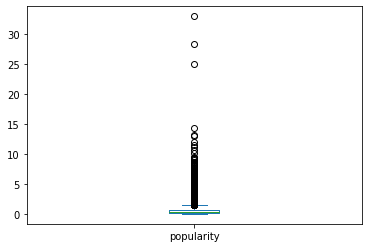

In [9]:
df['popularity'].plot(kind='box');
df.query('popularity > 15').describe()
#df.query('popularity > 15').genres.value_counts()

Documentary                           3
War|Drama|Action|Adventure|History    1
Action|Drama|War                      1
History|Drama                         1
Science Fiction                       1
Drama|History|Western                 1
Name: genres, dtype: int64

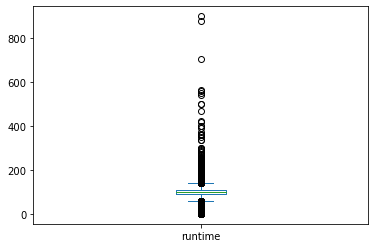

In [10]:
df['runtime'].plot(kind='box');
df.query('runtime > 500').genres.value_counts()

### Preliminary Data Description

> The dataset contains about 10866 rows with 21 columns some of which can be droped because they could be irrelevant to the analysis.
> **columns**: overview, homepage, keywords, tagline, vote count, title, id and imdb_id could be dropped. For **budget and revenue** columns, we will be using the **budget_adj and revenue_adj** instead so we compare the movies budgets and revenues with regard to the same value reference (2010 US dollars).

> **The datatypes** are practical to use and do not need any modifications.

> The column "**production_companies**" has the most null values (1030 value), and since it is a string column, we cannot fill in gaps with interpolation. Another way is to either drop all rows with null values or drop the entire column and execlude it from the analysis. Here I chose to drop the entire column.

> The columns **cast**, **director** and **genres** also have some missing values which we can drop.

> The dataset has only **one duplicated row** which we can eliminate.

> Most of the data distributions are very skewed to the right (e.g. popularity, budget, revenue, runtime ..) except for the vote_average, which is normally distributed.
> The data seems to contain a lot of outliers. Most outliers have specific properties such as very high budget and revenue movies have very high popularity and vice versa. The top 3 popular movies are action and adventure movies produced between 2014-2015 with very high budget and revenue. In addition, movies with very long runtime are mostly documentary and historical movies. Therefore, **non of the outliers can be dropped**.



### Data Cleaning 

#### Now that we have inspected the dataset, we will first drop the unnecessary columns and duplicated rows, then fill null values and check for any additional errors in the dataset.

In [11]:
# displaying the column names of the df
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
## drop irrelevant columns
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis =1, inplace=True)

In [13]:
# check the results
df.head(1)

,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   cast          10790 non-null  object 
 2   director      10822 non-null  object 
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   release_year  10866 non-null  int64  
 8   budget_adj    10866 non-null  float64
 9   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 849.0+ KB


In [15]:
# drop null attributes
df.dropna(inplace=True)

In [16]:
# check the no of rows after dropping the null values
# now we have 10732 row instead of 10866
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10732 non-null  float64
 1   cast          10732 non-null  object 
 2   director      10732 non-null  object 
 3   runtime       10732 non-null  int64  
 4   genres        10732 non-null  object 
 5   vote_count    10732 non-null  int64  
 6   vote_average  10732 non-null  float64
 7   release_year  10732 non-null  int64  
 8   budget_adj    10732 non-null  float64
 9   revenue_adj   10732 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 922.3+ KB


In [17]:
# drop the duplicated row
df.drop_duplicates(inplace=True)

In [18]:
# Check the results
# only one row has been dropped
df.shape

(10731, 10)

In [19]:
# now that the dataset has been initially cleaned, we can export it to a csv file for later exploratory analysis
# Export our clean dataframe (Version 1)
df.to_csv('clean_v1.csv', index_label=False)

In [20]:
# import the data again to check for any errors
df_clean = pd.read_csv('clean_v1.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10731 non-null  float64
 1   cast          10731 non-null  object 
 2   director      10731 non-null  object 
 3   runtime       10731 non-null  int64  
 4   genres        10731 non-null  object 
 5   vote_count    10731 non-null  int64  
 6   vote_average  10731 non-null  float64
 7   release_year  10731 non-null  int64  
 8   budget_adj    10731 non-null  float64
 9   revenue_adj   10731 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 922.2+ KB


In [21]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Although we have cleaned the null values, there are many variables with missing data (as zero-value), e.g. in runtime, budget and revenue columns.
We can replaced the zero-value in the runtime column with the average runtime.
However, for the budget and revenue columns, we will adopt a different approach.

In [22]:
# check for the values of the budget revenue and get the no of zero-values
df_clean.query('budget_adj==0').budget_adj.value_counts(), df_clean.query('revenue_adj==0').revenue_adj.value_counts()

(0.0    5578
 Name: budget_adj, dtype: int64,
 0.0    5888
 Name: revenue_adj, dtype: int64)

#### More than half of the dataset has zero-value in budget/revenue columns

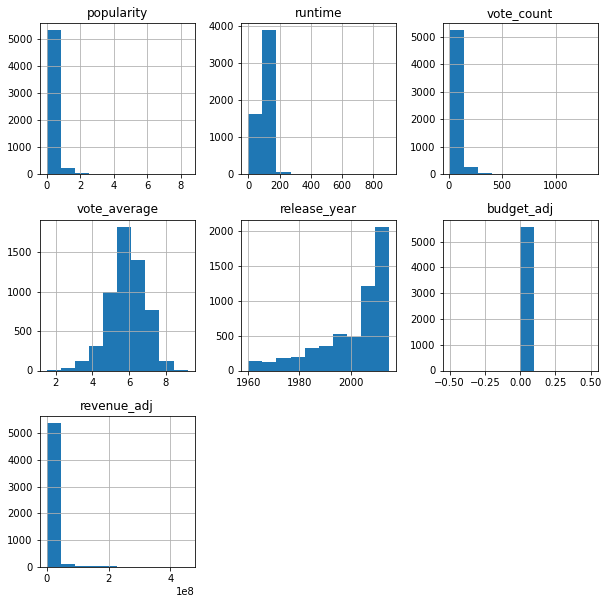

In [23]:
# check the characteristics of the dataset for the zero value in the budget column 
df_clean.query('budget_adj == 0').hist(figsize=(10,10));

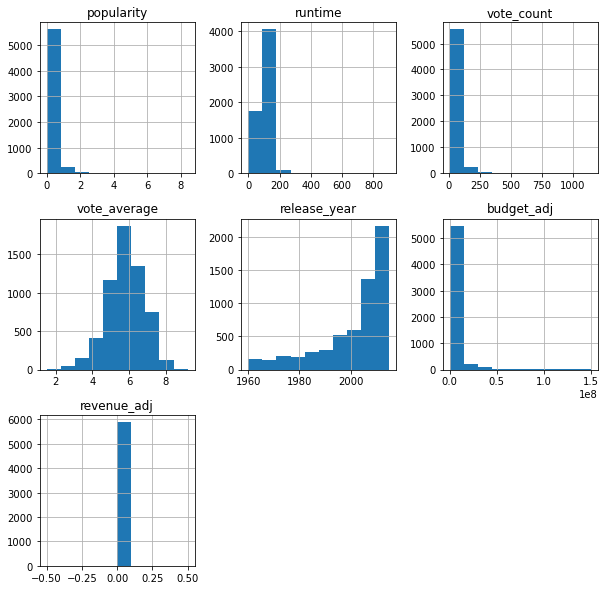

In [24]:
# check the characteristics of the dataset for the zero value in the revenue column 
df_clean.query('revenue_adj == 0').hist(figsize=(10,10));

#### The zero budget and revenue attributes have the same characteristics as the original data

In [25]:
# check the no. of movies with Zero runtime
df_clean.query('runtime == 0').shape

(28, 10)

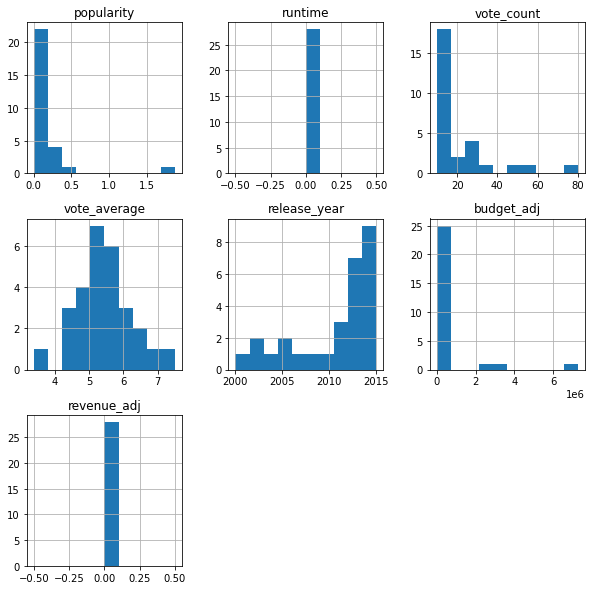

In [26]:
# check the characteristics of the dataset for the zero runtime
df_clean.query('runtime == 0').hist(figsize=(10,10));

**For zero runtime**, the majority of the dataset has a runtime between 90 and 112 mins, and there is nothing unique for the zero runtime movies with regard to the other variables. Therefore, replacing the zero runtime with the average of the runtime colum is appropriate. 

In [27]:
df_clean.runtime.describe()

count    10731.000000
mean       102.468829
std         30.493873
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [28]:
# Create a mask for the zero runtime to fill in with the average runtime
zero_runtime_mask = df_clean.runtime == 0
df_clean.loc[zero_runtime_mask, 'runtime'] = df_clean['runtime'].mean()
df_clean.runtime.describe()


count    10731.000000
mean       102.736197
std         30.040062
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

**For zero-values in budget and revenue columns** replacing the zero-value with any value, e.g. column mean, would be inconvenient since more than half of the dataset has zero-values in these columns. 

There might be a relation between the genre and the budget, e.g. Action movies are expected to have much higher budget than comedies or documentary.

Therefore, substituting for the zero value in budget column with the average by genre looks more appropriate.

In [29]:
# exploring the most common genres
df.genres.value_counts().head(10)

Drama                   710
Comedy                  707
Drama|Romance           289
Comedy|Drama            280
Documentary             274
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

In [30]:
## Create masks for the most popular/common genres in the 
action_mask = df_clean['genres'].str.contains('Action')
drama_mask = df_clean['genres'].str.contains('Drama')
comedy_mask = df_clean['genres'].str.contains('Comedy')
doc_mask = df_clean['genres'].str.contains('Documentary')
horror_mask = df_clean['genres'].str.contains('Horror')
anim_mask = df_clean['genres'].str.contains('Animation')
adventure_mask = df_clean['genres'].str.contains('Adventure')

In [31]:
df_clean[drama_mask].describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03,4.746000e+03
mean,0.592844,110.688949,183.027181,6.163611,2000.932996,1.489402e+07,4.053378e+07
std,0.800339,28.547290,478.613386,0.811317,12.834266,2.723061e+07,1.140945e+08
min,0.000188,6.000000,10.000000,2.400000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224188,96.000000,17.000000,5.700000,1994.250000,0.000000e+00,0.000000e+00
50%,0.390120,106.000000,37.000000,6.200000,2005.000000,0.000000e+00,0.000000e+00
75%,0.674140,119.000000,133.000000,6.700000,2011.000000,2.000000e+07,2.878830e+07
max,24.949134,705.000000,8432.000000,8.800000,2015.000000,2.716921e+08,2.506406e+09


In [32]:
# comparing the budget means for the Action and Comedy movies
df_clean.budget_adj[action_mask].mean(), df_clean.budget_adj[comedy_mask].mean()

(33071086.01694719, 15993823.718668353)

#### It can be noticed that there are a significant difference betweeen the budgets of different movie genres as expected

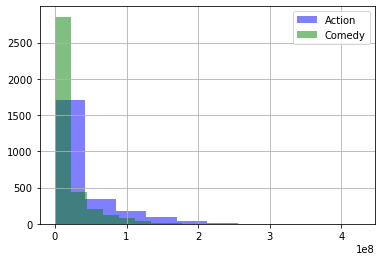

In [33]:
# Comparing the budgets distributions of Action and Comdey movies
df_clean.budget_adj[action_mask].hist(color='blue', label='Action', alpha=0.5)
df_clean.budget_adj[comedy_mask].hist(color='green', label='Comedy', alpha=0.5)
plt.legend()

It can be observed that the **Action movies** have significantly higher budget than **comedy movies**, which justifies the substitution for the zero value in the budget column by the average budget per genre

In [36]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.736197,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.040062,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [66]:
# Create a list of masks
genre_masks = [action_mask, drama_mask, comedy_mask, doc_mask, horror_mask, anim_mask, adventure_mask]

# define a function that replaces all zero values for budget and revenue columns with the averages per genre
def replace_zero_value(genre_mask):
        zero_budget_mask = df_clean['budget_adj'] == 0
        zero_revenue_mask = df_clean['revenue_adj'] == 0
        comp_mask_bud = genre_mask & zero_budget_mask
        comp_mask_rev = genre_mask & zero_revenue_mask
        df_clean.loc[comp_mask_bud, 'budget_adj'] = df_clean.budget_adj[genre_mask].mean()
        df_clean.loc[comp_mask_rev, 'revenue_adj'] = df_clean.revenue_adj[genre_mask].mean()
        return df_clean
# Loop over the list of masks and call the function
for genre_mask in genre_masks:
    replace_zero_value(genre_mask)           


In [74]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.736197,219.812972,5.964710,2001.259622,2.859077e+07,8.564194e+07
std,1.004804,30.040062,578.815324,0.930283,12.820151,3.084924e+07,1.376870e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,1.308203e+07,4.104520e+07
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,2.026067e+07,4.778898e+07
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,3.307109e+07,9.206722e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [75]:
zero_budget_mask = df_clean['budget_adj'] == 0
zero_revenue_mask = df_clean['revenue_adj'] == 0

In [76]:
# Check how many zero values in the budget column are left
df_clean[zero_revenue_mask].groupby('genres').genres.value_counts()
df_clean[zero_revenue_mask].describe()
#df_clean[zero_revenue_mask].head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now, about 257 and 287 rows with zero budget and revenue values respectively, which we can either drop or fill with the df.budget.adj average and df.revenue.adj

In [77]:
# Filling the zero-value budget with the column average
df_clean.loc[zero_budget_mask, 'budget_adj'] = df_clean.query('budget_adj != 0').budget_adj.mean()
df_clean.loc[zero_revenue_mask, 'revenue_adj'] = df_clean.query('revenue_adj != 0').revenue_adj.mean()

In [78]:
# check the results
df_clean.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.736197,219.812972,5.964710,2001.259622,2.859077e+07,8.564194e+07
std,1.004804,30.040062,578.815324,0.930283,12.820151,3.084924e+07,1.376870e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,1.308203e+07,4.104520e+07
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,2.026067e+07,4.778898e+07
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,3.307109e+07,9.206722e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Now we have cleaned the data and substitute for the zero-values in budget and revenue columns.
#### We will export the cleaned version (version 2) as csv file

In [123]:
df_clean.to_csv('df_clean_v2.csv', index_label=False)

In [80]:
df1 = pd.read_csv('df_clean_v2.csv')
df1.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.736197,219.812972,5.964710,2001.259622,2.859077e+07,8.564194e+07
std,1.004804,30.040062,578.815324,0.930283,12.820151,3.084924e+07,1.376870e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,1.308203e+07,4.104520e+07
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,2.026067e+07,4.778898e+07
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,3.307109e+07,9.206722e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [81]:
df1.head(3)

,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08


### Now the data is cleaned and ready for the Exploratory Data Analysis (EDA)

<a id='eda'></a>
## Exploratory Data Analysis

### **Research Questions**: We have six research questions some of which are interrelated as follow:
> Research Question 1: What is the most growing movie genres in the dataset?

> Research Question 2: Which genres are most popular from year to year? 

> Research Question 3: What are the factors affecting movie popularity?

> Research Question 4: What is the relationship between movie budget and movie revenue?

> Research Question 5: What kinds of properties are associated with movies that have high budgets?

> Research Question 6: What kinds of properties are associated with movies that have high revenues?


#### In this dataset, movie populairty and revenues are our dependent variable with several independent variables e.g. budget, movie star, director and genre.
> Initially, we will start by ceating two additional columns, the main_genre and the main_star columns, by assuming that the first genre in the genre column and the first actor/actress in the cast column are the main genre and star respectively.

> This will help with the analysis when grouping by genres or movie stars and find any correlation between movie genre or movie star the the popularity or revenue of the movie.

In [82]:
# Using str.split to create two dataframes from the cast and genres columns
star_df = df1['cast'].str.split("|", expand=True)
genre_df = df1['genres'].str.split("|", expand=True)

In [83]:
star_df.head(1)
genre_df.head(1)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None


In [84]:
# Eliminating all columns except the 1st one for the main_star
drop_list_star = [x for x in range(1, len(star_df.columns))]
drop_list_star
star_df.drop(drop_list_star, axis=1, inplace=True)

In [85]:
# Eliminating all columns except the 1st one for the main_genre
drop_list_genre = [x for x in range(1, len(genre_df.columns))]
drop_list_genre
genre_df.drop(drop_list_genre, axis=1, inplace=True)

In [86]:
star_df.shape, star_df.head(2)

((10731, 1),
              0
 0  Chris Pratt
 1    Tom Hardy)

In [87]:
genre_df.shape, genre_df.head(2)

((10731, 1),
         0
 0  Action
 1  Action)

In [88]:
# Merging the dataframes of main_star and main_genre
new_df = pd.merge(star_df, genre_df, how='inner', left_index=True, right_index=True)

In [89]:
new_df.head(1)

,0_x,0_y
0,Chris Pratt,Action


In [90]:
# Rename the columns in the new_df 
new_df.rename(columns = {'0_x': 'main_star', '0_y': 'main_genre'}, inplace=True)

In [91]:
# Merging the new_df with the df2 
df2 = pd.merge(df1, new_df, how='inner', left_index=True, right_index=True)

In [92]:
# check the df2 rows and columns
df2.shape

(10731, 12)

In [93]:
df2.head(2)

,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_star,main_genre
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action


### Research Question 1: What is the most growing movie genres in the dataset?

In [94]:
# find out the number of movies/genre of all time span (1960-2015)
df2.main_genre.value_counts()

Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: main_genre, dtype: int64

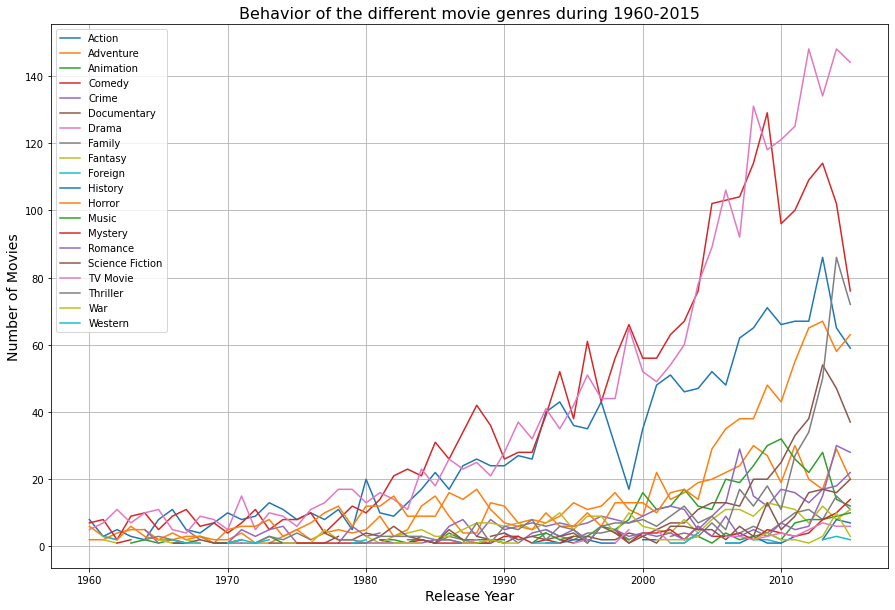

In [95]:
# Group by release year and movie genre, then plot the results as a line plot
# Adding the vote_average here is irrelevant, we only need the count of movie genre per year which is the same for all columns. 
df2.groupby(['release_year', 'main_genre']).count()['vote_average'].unstack().plot(figsize=(15,10))
plt.legend();
plt.grid();
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Behavior of the different movie genres during 1960-2015', fontsize=16);

#### Movie genres behavior during 1960-2015
> It can be observed that **Drama** is the most growing movie genre during the entire time span with an increase of about 400% in the past 25 years, followed by **Comedy, Action** with an increase of about **300%** and **250%** respectively. In addition, **Horror, Thriller and Documentary** movies have also grwon significantly during 1960-2015. Comedy movies, however, seems to lose popularity in the past few years. 

### Research Question 2: Which genres are most popular from year to year?

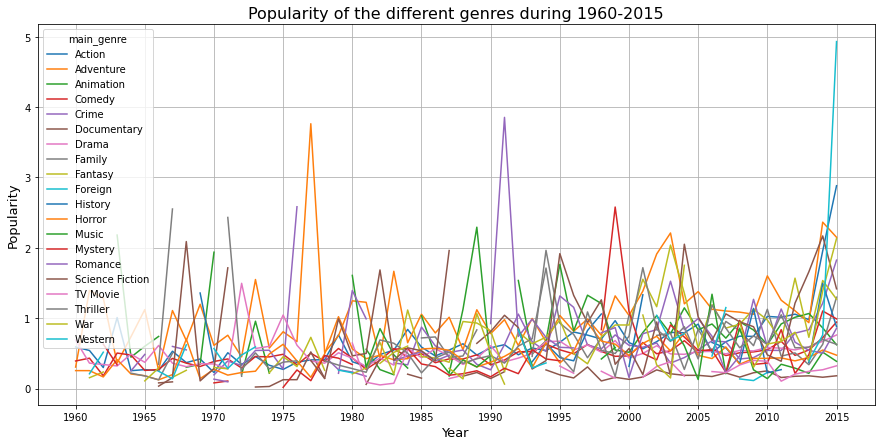

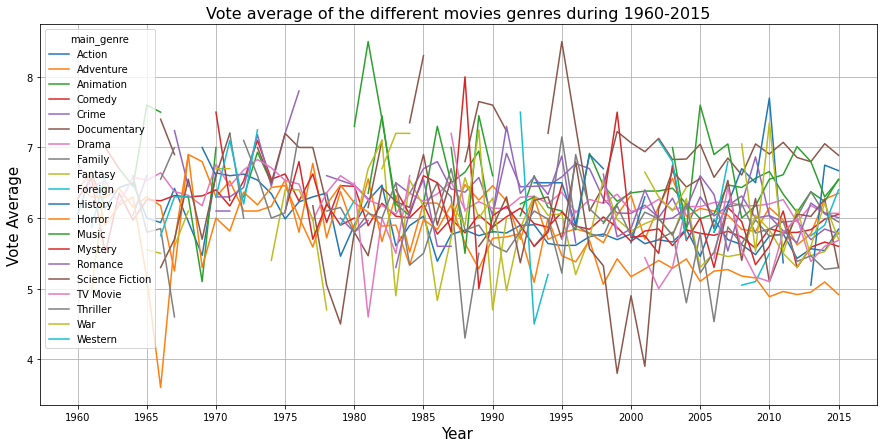

In [96]:
# plotting the average popularity and vote_rating for every main_genre during 1960-2015
df2.groupby(['release_year', 'main_genre']).popularity.mean().unstack().plot(figsize=(15,7));
plt.grid(True)
plt.xticks([x for x in range(1960, 2020, 5)]);
plt.xlabel('Year', fontsize=13)
plt.ylabel('Popularity', fontsize=13)
plt.title('Popularity of the different genres during 1960-2015', fontsize=16)

df2.groupby(['release_year', 'main_genre']).vote_average.mean().unstack().plot(figsize=(15,7));
plt.grid(True)
plt.xticks([x for x in range(1960, 2020, 5)]);
plt.xlabel('Year', fontsize=15)
plt.ylabel('Vote Average', fontsize=15)
plt.title('Vote average of the different movies genres during 1960-2015', fontsize=16);

#### Popularity of different movie genres during 1960-2015
> It can be noticed that the popularity of movie genres does not has specific trends during the time span 1960-2015. However, there are certain movie genres that are very popular during certain years. For example, foreign, romance and adventure movies have quite high popularity during 2015, 1991 and 1977.
A similar pattern is observed if we investigate against the vote average. However, Animation, and Documentary movies received the highest voting during 1981 and 1995.

### Research Question 3: What are the factors affecting movie popularity?

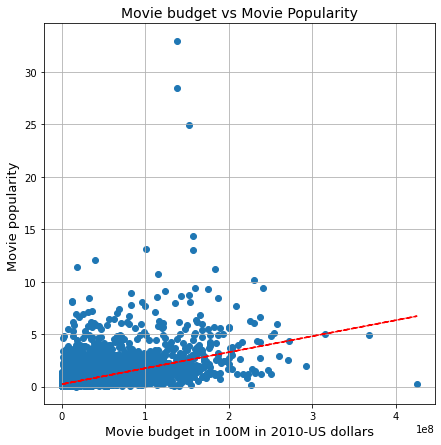

In [97]:
# Checking if there is a relation between movie budget and movie popularity, with trend line
plt.figure(figsize=(7,7))
plt.scatter(df2.budget_adj, df2.popularity);
# plotting the tren line
z = np.polyfit(df2.budget_adj, df2.popularity, 1)
p = np.poly1d(z)
plt.plot(df2.budget_adj, p(df2.budget_adj), "r--")

plt.grid(True)
plt.xlabel('Movie budget in 100M in 2010-US dollars', fontsize=13)
plt.ylabel('Movie popularity ', fontsize=13)
plt.title('Movie budget vs Movie Popularity', fontsize=14);

#### Movie budget vs popularity
> Although there is a positive correlation between movie budget and popularity, it is not very strong correlation that can explain high popularity movies, where there are few very popular movies with average budgets.
> There must be other factors that influence the movie popularity.

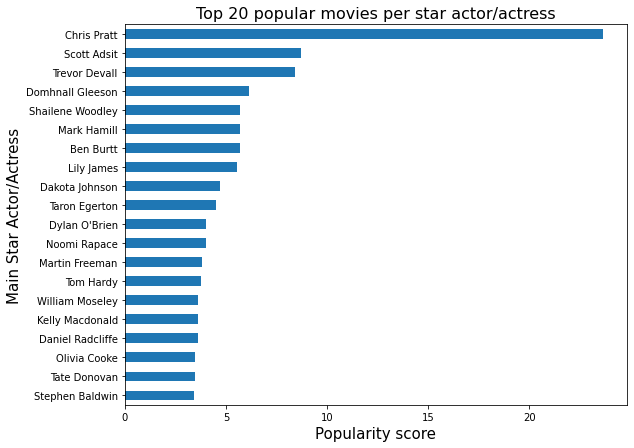

In [98]:
# Impact of the main star actor/actress on the movie popularity
df2.groupby('main_star').popularity.mean().sort_values(ascending=False).head(20).sort_values().plot(kind='barh', figsize=(9,7))
plt.ylabel('Main Star Actor/Actress', fontsize=15)
plt.xlabel('Popularity score', fontsize=15)
plt.title('Top 20 popular movies per star actor/actress', fontsize=16);

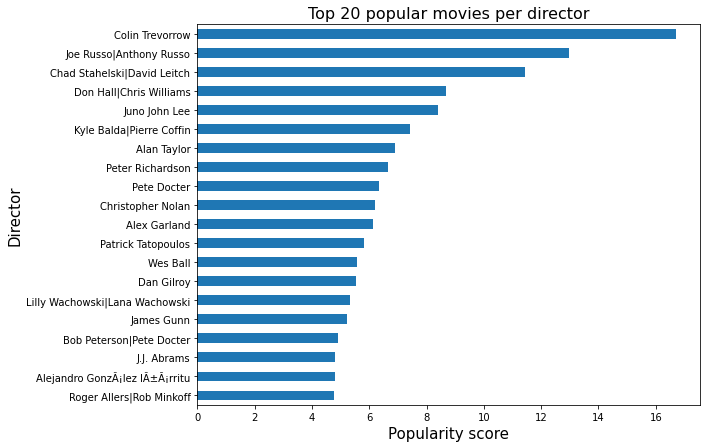

In [99]:
# Impact of the main director on the movie popularity
df2.groupby('director').popularity.mean().sort_values(ascending=False).head(20).sort_values().plot(kind='barh', figsize=(9,7))
plt.ylabel('Director', fontsize=15)
plt.xlabel('Popularity score', fontsize=15)
plt.title('Top 20 popular movies per director', fontsize=16);

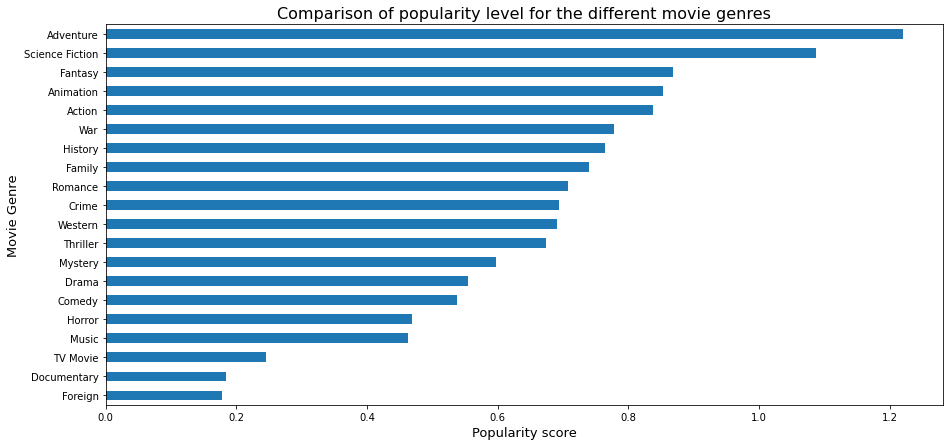

In [100]:
# Popularity by Genre
df2.groupby('main_genre').popularity.mean().sort_values().plot(kind='barh', figsize=(15,7));
plt.title('Comparison of popularity level for the different movie genres', fontsize=16)
plt.xlabel('Popularity score', fontsize=13)
plt.ylabel('Movie Genre', fontsize=13);

#### Movie stars, Directors and Genres vs Popularity
> It can be noticed that some movie stars have very high-average movie popularity as high as 24, **e.g. Chris Pratt**, followed by some stars with associated movie popularities ranging from 4 to 10.

> In addition, movie directors must have impact on the popularity of their movies. It can be observed that there is a significant correlation between movie director and the average popularity where there are high average popularity scores associated with certain movie directors. From the top 20 popular movies/director, **Colin Trevorrow** has the most popular movies in the time span (1960-2015).

> Finally, investigating the different movie genres in the dataset reveals that there is a trend associated with movie genres and popularity. Adventure and Science fiction movies have the highest popularity of all movie genres followed by Fantasy, Animation and Action movies. On the other hand, Documentary and Foreign movie genres have the lowest popularity score.

> Movie popularity seems to be affected by different variables, e.g. budget, movie star, director, and movie genre. 
The popularity might increase with the movie budget, however, popularity is also associated with certain directors, genres and movie stars that can increase the movie's popularity even with lower budget. 

### Research Question 4:  What is the relationship  between movie budget and movie revenue?

In [101]:
df2.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.736197,219.812972,5.964710,2001.259622,2.859077e+07,8.564194e+07
std,1.004804,30.040062,578.815324,0.930283,12.820151,3.084924e+07,1.376870e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,1.308203e+07,4.104520e+07
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,2.026067e+07,4.778898e+07
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,3.307109e+07,9.206722e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


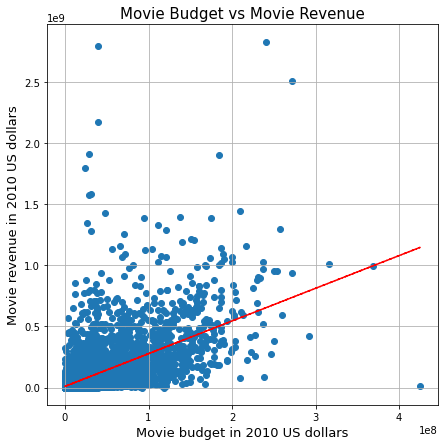

In [102]:
# Checking if there is a relation between movie budget and movie revenue, with trend line
plt.figure(figsize=(7,7))
plt.scatter(df2.budget_adj, df2.revenue_adj);


# plotting the tren line
z = np.polyfit(df2.budget_adj, df2.revenue_adj, 1)
p = np.poly1d(z)
plt.plot(df2.budget_adj, p(df2.budget_adj), "r--")

plt.grid(True)
plt.xlabel('Movie budget in 2010 US dollars', fontsize=13)
plt.ylabel('Movie revenue in 2010 US dollars', fontsize=13)
plt.title('Movie Budget vs Movie Revenue', fontsize=15);

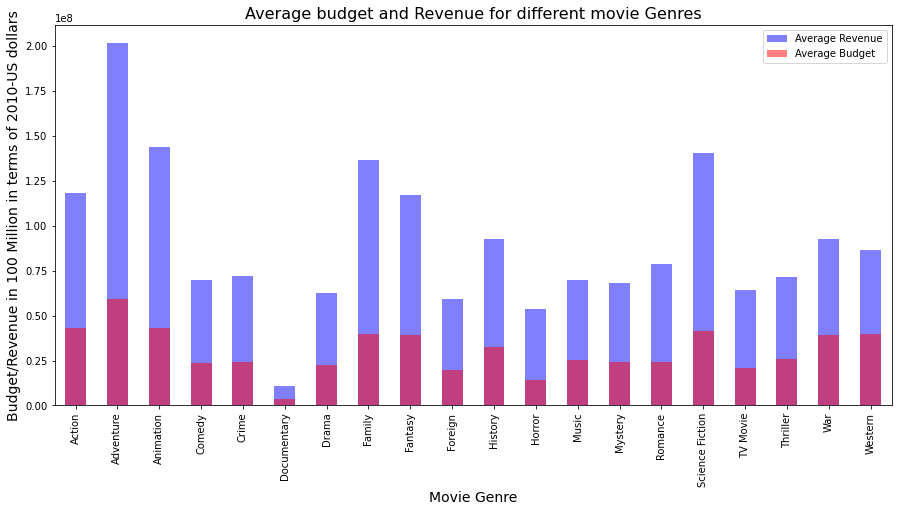

In [103]:
# Movie revenue and budget for the different movie genres
df2.groupby('main_genre').revenue_adj.mean().plot(kind='bar', label='Average Revenue', color='blue', alpha=0.5, figsize=(15,7))
df2.groupby('main_genre').budget_adj.mean().plot(kind='bar', label='Average Budget', color='red', alpha=0.5)
plt.legend();
plt.title('Average budget and Revenue for different movie Genres', fontsize=16)
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Budget/Revenue in 100 Million in terms of 2010-US dollars', fontsize=14);

#### Movie budget vs revenue
> It looks like there is a significant positive trend/relation between the movie budget and its revenue. The revenue is increasing with the increasing in movie budget. However, is this the case for all movie genres?!

> Taking a closer look on the same pattern (movie budget vs revenue) per movie genres shows that there is definitely a correlation between the movie budget and the revenue. This relation is more pronounced for the Adventure, Action, Animation, Family and Science Fiction movie genres which have the higher movie budget with the highest revenue. 


### Research Question 5: What kinds of properties are associated with movies that have high budgets?
### Research Question 6: What kinds of properties are associated with movies that have high revenues?

#### We will first categorize/classify both budget and revenue columns into 4 level (low, medium, high and very high)

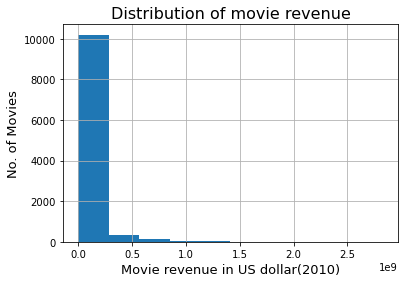

In [104]:
# Categorize the revenue_adj column into a revenue_level column
# Inspecting the distribution of the movie revenue
df2.revenue_adj.hist()
plt.title('Distribution of movie revenue', fontsize=16)
plt.xlabel('Movie revenue in US dollar(2010)', fontsize=13)
plt.ylabel('No. of Movies', fontsize=13)

# Classify the movie revenue into four levels
df2['revenue_level']= pd.cut(df2.revenue_adj, bins=[0, 0.2e+09, 0.5e+09, 1.0e+09, 3.0e+09], include_lowest= True, labels=['low', 'medium', 'high', 'very_high']);

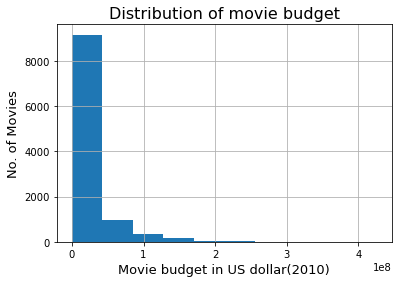

In [105]:
# Categorize the budget_adj column into a revenue_level column
# Inspecting the distribution of the movie budget
df2.budget_adj.hist()
plt.title('Distribution of movie budget', fontsize=16)
plt.xlabel('Movie budget in US dollar(2010)', fontsize=13)
plt.ylabel('No. of Movies', fontsize=13)

# Classify the movie budget into four levels
df2['budget_level']= pd.cut(df2.budget_adj, bins=[0, 0.2e+08, 0.5e+08, 1.0e+08, 5.0e+08], include_lowest= True, labels=['low', 'medium', 'high', 'very_high'])

In [106]:
# check the classification results
df2.head(1)

,popularity,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_star,main_genre,revenue_level,budget_level
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,very_high,very_high


### Investigating the high budget movies...

In [107]:
# Characteristics of each movie budget level
# grouping by budget levels and calculating the associated average popularity, vote_average and budget
df2.groupby('budget_level')[['popularity', 'vote_average', 'budget_adj']].mean()

,popularity,vote_average,budget_adj
budget_level,,,
low,0.441032,5.972364,1.175185e+07
medium,0.593638,5.906020,2.915640e+07
high,1.221623,6.040649,6.967887e+07
very_high,2.639455,6.264539,1.454997e+08


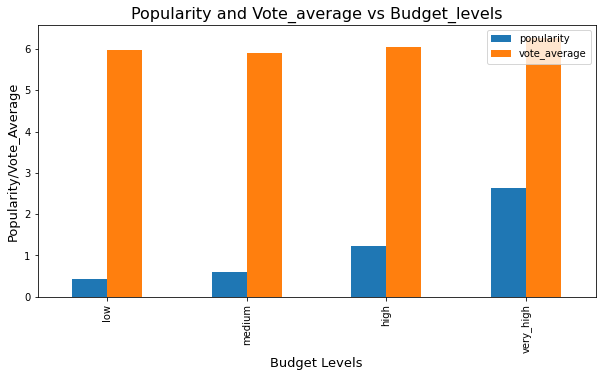

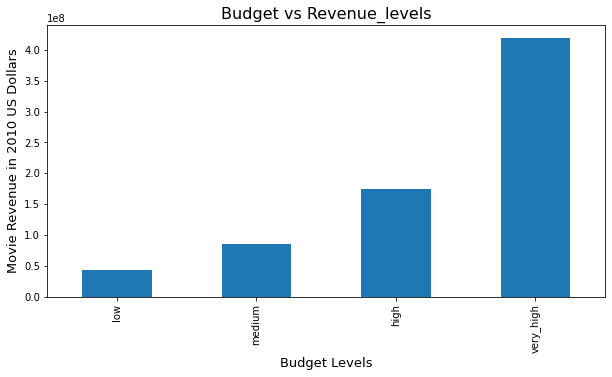

In [108]:
# Characteristics of each movie budget level (popularity, vote_average and budget)
# plotting a bar chart showing the average popularity, vote_average and budget 
# for every individual budget level.
df2.groupby('budget_level')[['popularity', 'vote_average']].mean().plot(kind='bar', figsize=(10,5))
plt.title('Popularity and Vote_average vs Budget_levels', fontsize=16)
plt.xlabel('Budget Levels', fontsize=13)
plt.ylabel('Popularity/Vote_Average', fontsize=13);

plt.figure()
df2.groupby('budget_level')['revenue_adj'].mean().plot(kind='bar', figsize=(10,5));
plt.title('Budget vs Revenue_levels', fontsize=16)
plt.xlabel('Budget Levels', fontsize=13)
plt.ylabel('Movie Revenue in 2010 US Dollars', fontsize=13);

#### Budget levels vs (Popularity, Vote_average and revenue)
> Investigating the characteristics of the high-budget movies shows that, there is a significant positive correlation between the budget and movie popularity and movie revenue. However, the average voting is not affected by the movie budget.

In [109]:
# Top (most frequent) movie genres per movie budget level
df2.groupby('budget_level').main_genre.describe()

,count,unique,top,freq
budget_level,,,,
low,5330,20,Drama,1849
medium,4053,20,Comedy,1234
high,925,18,Action,218
very_high,423,17,Action,137


In [110]:
# Top (most frequent) movie genres per movie budget level
df2.groupby('budget_level').director.describe()

,count,unique,top,freq
budget_level,,,,
low,5330,3361,Woody Allen,27
medium,4053,2429,Clint Eastwood,20
high,925,535,Steven Spielberg,13
very_high,423,245,Michael Bay,9


In [111]:
# Top (most frequent) movie stars per movie budget level
df2.groupby('budget_level').main_star.describe()

,count,unique,top,freq
budget_level,,,,
low,5330,3060,Steven Seagal,20
medium,4053,1986,Clint Eastwood,24
high,925,411,Bruce Willis,20
very_high,423,227,Tom Cruise,12


In [112]:
# Calculating the percentages of each movie genres for the very high budget movie level
df2.query('budget_level == "very_high"').main_genre.value_counts(normalize=True)*100

Action             32.387707
Adventure          25.531915
Animation           7.801418
Drama               7.801418
Science Fiction     6.382979
Fantasy             5.200946
Comedy              4.255319
Thriller            2.836879
Family              2.600473
Western             1.182033
War                 0.945626
Music               0.945626
Horror              0.709220
History             0.472813
Crime               0.472813
Romance             0.236407
Mystery             0.236407
Name: main_genre, dtype: float64

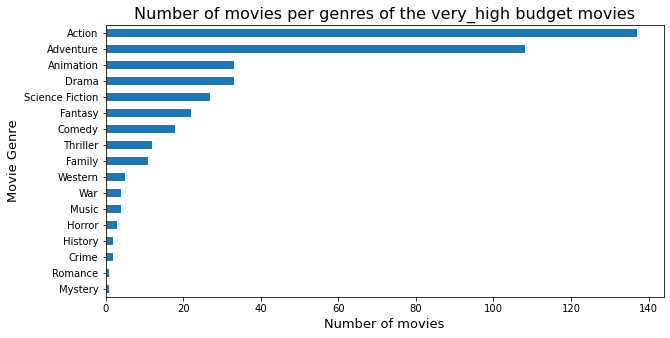

In [113]:
# Characteristics of very_high budget movies (Genres)
df2.query('budget_level == "very_high"').main_genre.value_counts().sort_values().plot(kind='barh', figsize=(10,5));
plt.title('Number of movies per genres of the very_high budget movies', fontsize=16)
plt.xlabel('Number of movies', fontsize=13)
plt.ylabel('Movie Genre', fontsize=13);

#### Movie budget levels vs (Movie genres, Directors and Stars )

> The high and very high budget movies represent more than **12.5%** of all movies in this dataset. 

> Action movies dominate the **high and very high** budget movies with more than 26%, while Drama movies seems to be the most frequent low-budget movies with more than 33% of all movies in this level.

> In the **very high budget level**, **Action and Adventure** movies represent more than **57%** followed by Animation (7.4%), Drama (7.4%), Science Fiction and Fantasy (11.6%) and Comedy (4.2%).

> Some directors are associated with low budget movies, while others are associated with higher budget movies. **Steven Spielberg and Michael Bay** are among the most frequent directors of high-budget movies, while **Woody Allen** is the most frequent director of lower budget movies.

> On the other hand, **Tom Cruise and Bruce Willis** are among the most frequent actors associated with high-budget movies where these actors mainly play Action rules, which are one of the highest budget movie genres. In addition, Steven Seagal seems to be one of the most frequent actors associated with lower budget movies.

> In summary, the high budget movies are mostly associated with  high revenues, dominated by **action and adventure** movie genres. In addition, the high budget movies are associated with some directors such as **Steven Spielberg and Michael Bay**, some movie stars such as **Tom Cruise and Bruce Willis** and they represent more than **12.5%** of all movies in the dataset. 

### Investigating the characteristics of high revenue movies...

In [114]:
# Characteristics of each movie revenue level
df2.groupby('revenue_level')[['popularity', 'vote_average', 'budget_adj']].mean()

,popularity,vote_average,budget_adj
revenue_level,,,
low,0.513131,5.921859,2.360895e+07
medium,1.906090,6.377583,7.941377e+07
high,3.068436,6.706522,1.146993e+08
very_high,5.768757,7.177273,1.334891e+08


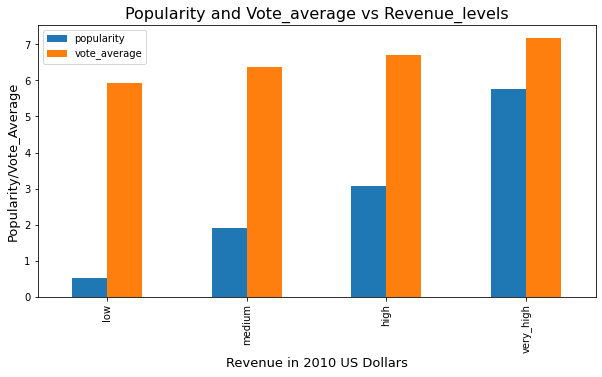

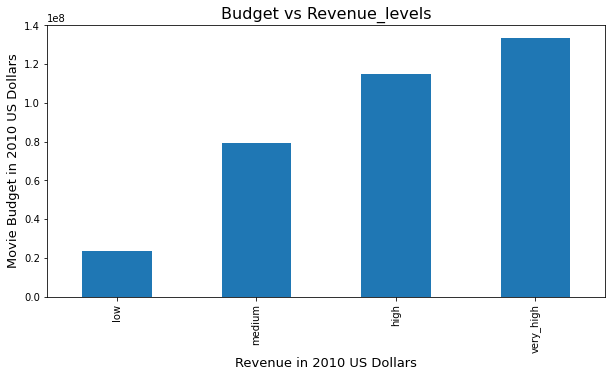

In [115]:
# Characteristics of each movie revenue level (popularity, vote_average and budget)

df2.groupby('revenue_level')[['popularity', 'vote_average']].mean().plot(kind='bar', figsize=(10,5))
plt.title('Popularity and Vote_average vs Revenue_levels', fontsize=16)
plt.xlabel('Revenue in 2010 US Dollars', fontsize=13)
plt.ylabel('Popularity/Vote_Average', fontsize=13);

plt.figure()
df2.groupby('revenue_level')['budget_adj'].mean().plot(kind='bar', figsize=(10,5));
plt.title('Budget vs Revenue_levels', fontsize=16)
plt.xlabel('Revenue in 2010 US Dollars', fontsize=13)
plt.ylabel('Movie Budget in 2010 US Dollars', fontsize=13);

#### Revenue levels vs (Popularity, Vote_average and budget)
> Investigating the characteristics of the high-revenue movies shows that, there is an association between the movie revenue, the movie popularity and the movie budget. Movies with high revenue are associated with high popularity and high budget levels. In addition, there is a correlation between the average voting the movie revenue.


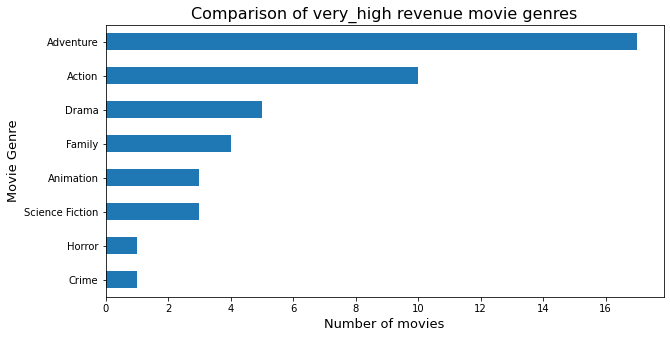

In [116]:
# Characteristics of very_high revenue movies (Genres)
df2.query('revenue_level == "very_high"').main_genre.value_counts().sort_values().plot(kind='barh', figsize=(10,5));
plt.title('Comparison of very_high revenue movie genres', fontsize=16)
plt.xlabel('Number of movies', fontsize=13)
plt.ylabel('Movie Genre', fontsize=13);

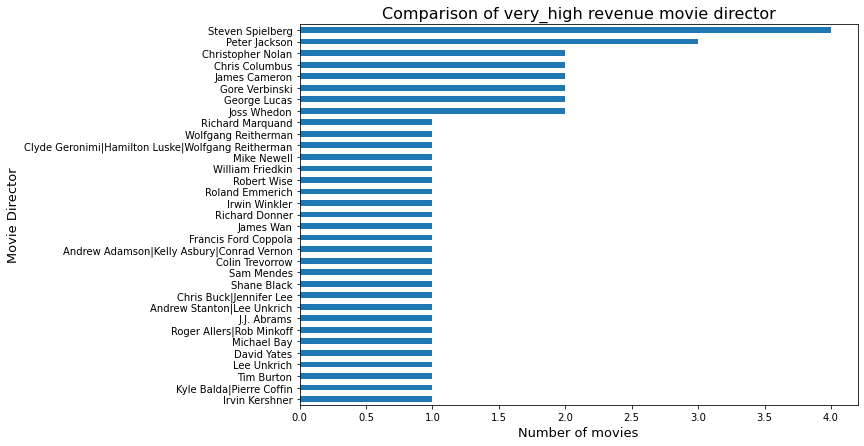

In [117]:
# Characteristics of very_high revenue movies (Directors)
df2.query('revenue_level == "very_high"').director.value_counts().sort_values().plot(kind='barh', figsize=(10,7));
plt.title('Comparison of very_high revenue movie director', fontsize=16)
plt.xlabel('Number of movies', fontsize=13)
plt.ylabel('Movie Director', fontsize=13);

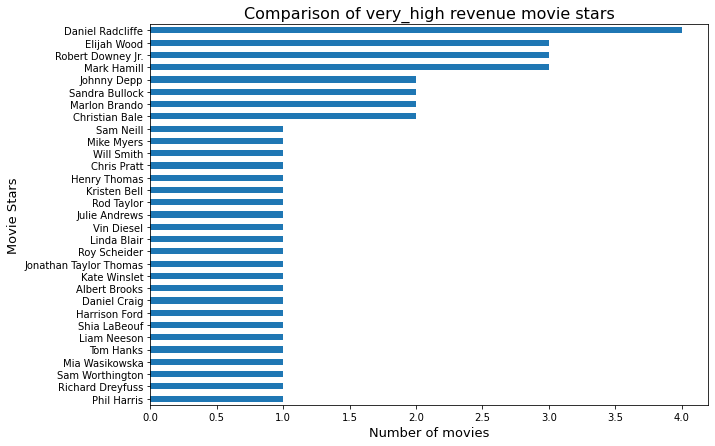

In [118]:
# Characteristics of very_high revenue movies (Star)
df2.query('revenue_level == "very_high"').main_star.value_counts().sort_values().plot(kind='barh', figsize=(10,7));
plt.title('Comparison of very_high revenue movie stars', fontsize=16)
plt.xlabel('Number of movies', fontsize=13)
plt.ylabel('Movie Stars', fontsize=13);

In [119]:
# Top (most frequent) movie genres per movie revenue level
df2.groupby('revenue_level').main_genre.describe()

,count,unique,top,freq
revenue_level,,,,
low,9932,20,Drama,2326
medium,571,17,Action,128
high,184,15,Adventure,52
very_high,44,8,Adventure,17


In [120]:
# Top (most frequent) movie director per movie revenue level
df2.groupby('revenue_level').director.describe()

,count,unique,top,freq
revenue_level,,,,
low,9932,4931,Woody Allen,45
medium,571,340,Steven Spielberg,10
high,184,126,Steven Spielberg,6
very_high,44,33,Steven Spielberg,4


In [121]:
# Top (most frequent) movie star per movie revenue level
df2.groupby('revenue_level').main_star.describe()

,count,unique,top,freq
revenue_level,,,,
low,9932,4228,Nicolas Cage,42
medium,571,279,Tom Cruise,17
high,184,106,Tom Hanks,7
very_high,44,31,Daniel Radcliffe,4


In [122]:
df2.query('revenue_level == "very_high"').main_genre.value_counts(normalize=True)*100

Adventure          38.636364
Action             22.727273
Drama              11.363636
Family              9.090909
Science Fiction     6.818182
Animation           6.818182
Crime               2.272727
Horror              2.272727
Name: main_genre, dtype: float64

#### High revenue movies

> The high and very high revenue movies represent only **2.1%** of all movies in this dataset.

> **Adventure** movies dominate the **high and very high revenue** movies with more than 30%, while Drama movies seems to be the most frequent low-revenue movies with more than 23% of all movies in this level.

> Some directors are associated with low revenue movies, while others are associated with higher revenue movies. **Steven Spielberg and Peter Jackson** are the most frequent directors of high-revenue movies during 1960-2015, while **Woody Allen** is the most frequent director of lower revenue movies.

> On the other hand, **Daniel Radcliffe, Elijah Wood, Robert Downey Jr. and Mark Hamill** are among the most frequent actors associated with very-high revenue movies. In addition, **Nicolas Cage** seems to be one of the most frequent actors associated with lower revenue movies. 

> According to movie genres, **Adventure and Action** movies represent more than **61%** of the **very high-revenue** movies.

> In summary, the high revenue movies are mostly associated with  high budgets, dominated by **action and adventure movie** genres. In addition, the high revenue movies are associated with some directors such as **Steven Spielberg and Peter Jackson**, some movie stars such as **Daniel Radcliffe, Elijah Wood Robert Downey Jr. and Mark Hamill** and they represent about **2.1%** of all movies in the dataset. 

<a id='conclusions'></a>
## Conclusions

> Different movie genres are observed to be growing more than others in the movie business. Drama is the most growing movie genre during the 1960-2015 followed by Comedy and Action genres. No significant trends were observed for increasing movie genres popularity on the yearly basis.
Although positive trends were observed between movie budget and popularity, high movie popularity is also associated with certain movie genres, directors, and movie stars.
A significant positive trend was observed between movie budget and revenue; however, this trend is also affected by movie genres where it is more pronounced with adventure and science fiction movies. 

> High and very high budget movies (12.5% of all dataset) are dominated by Action movies (26%) compared to (33%) and correlated to higher revenue movies. In addition, high budget movies are mostly associated with directors e.g. Steven Spielberg and Michael Bay and movie stars e.g. Tom Cruise and Bruce Willis. On the other hand, Drama movies dominates the low budget movie business.

> On the other hand, high revenue movies are associated with high popularity, high budget and relatively high average voting. They represent only 2.1% of the entire dataset and they are often associated with directors e.g. Steven Spielberg and Peter Jackson and movie stars e.g. Daniel Radcliffe, Elijah Wood and Robert Downey Jr. This movie category is dominated by Adventure and Action movies, which are at the higher end of movie budgets. 

> So, there is no single factor or one success recipe that can determine the success or failure of a certain movie. The movie popularity and revenue are affected by many different factors. However, some movie genres are more successful than others and some movie stars and directors are associated with successful movies. Therefore, with the appropriate budget and careful choice of movie stars and directors, a success movie recipe might be possible.

> More analysis can be made with machine learning and multi-dimensional variable classifications for more understanding of the interrelationship between the different variables in the dataset.  

### **Limitations**

> An assumption has been made to substite for Zero-values in budget and revenue based on the average budget and revenue per movie genre.

> The analysis was based on the movie genre and movie star extracted from the genres and cast columns respectively with an assumption that the first element in each column represent the main genre and the main star respectively. 

> Analysis was based only on descriptive statistics with no inferential statistics or machine learning-driven conclusions.

> There might be a relation between movie popularity & revenue and the production company, however, due to missing values in the production companies of the dataset, this variable was excluded from the analysis.

### **References**
> I have looked for some issues on the following websites:

> https://www.geeksforgeeks.org/

> https://stackoverflow.com/

> https://www.w3schools.com/